**This notebook covers how to build a standard CNN architecture for classification tasks using TensorFlow.**

Prepared by

*Asif Newaz*

*Lecturer, EEE, IUT*

# Importing Libraries

In [1]:
import tensorflow as tf

In [2]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [3]:
import matplotlib.pyplot as plt
# for plotting

In [4]:
import pandas as pd
import numpy as np

# Importing Data

We will work with the CIFAR10 dataset to begin with. The dataset is available in the TensorFlow library. It can be directly loaded into colab.

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

170498071/170498071 [==============================] - 3s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

The training set has 50000 images. The size of the images is (32,32,3) - that is they are RGB images.

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',   'dog', 'frog', 'horse', 'ship', 'truck']
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

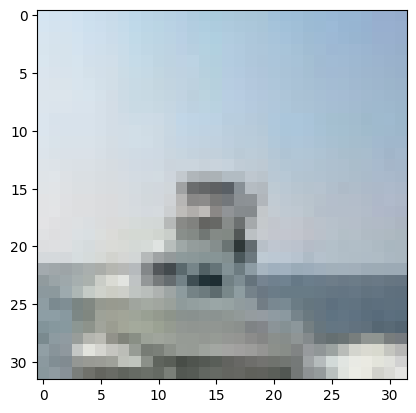

In [9]:
image = X_train[100]
plt.imshow(image)
plt.show()

In [10]:
y_train[100]

array([8], dtype=uint8)

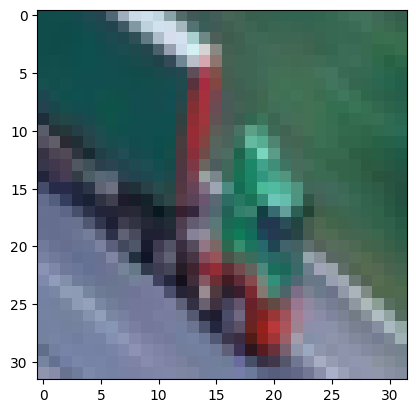

In [11]:
image = X_train[50]
plt.imshow(image)
plt.show()

In [12]:
y_train[50]

array([9], dtype=uint8)

# Creating CNN architecture

In [13]:
X_train = X_train / 255
X_test = X_test / 255
# normalizing the input pixel values

In [14]:
X_train[0].shape

(32, 32, 3)

In [16]:
# Version - 01
# Creating a simple CNN network with only 4 layers

model_v1 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [17]:
model_v1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

So the network has a total of 430,102 trainable parameters.
To understand parameter calculation, look at this article - https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model

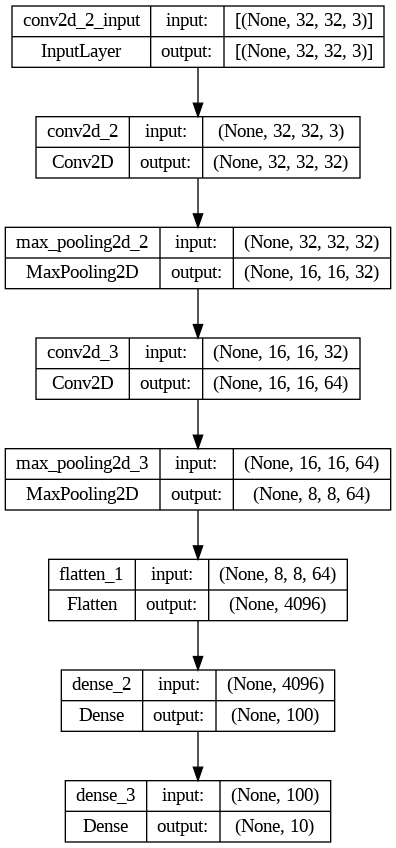

In [18]:
tf.keras.utils.plot_model(
    model_v1,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    dpi=96,
)

# Model Training

In [19]:
model_v1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [20]:
history = model_v1.fit(X_train,y_train, epochs=50,validation_data=(X_test,y_test))
# Training for 50 epochs for now

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 11s 5ms/step - loss: 1.3661 - accuracy: 0.5124 - val_loss: 1.1113 - val_accuracy: 0.6104
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0083 - accuracy: 0.6458 - val_loss: 1.0262 - val_accuracy: 0.6417
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8723 - accuracy: 0.6956 - val_loss: 0.8990 - val_accuracy: 0.6896
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7743 - accuracy: 0.7274 - val_loss: 0.8981 - val_accuracy: 0.6914
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6947 - accuracy: 0.7544 - val_loss: 0.8735 - val_accuracy: 0.7039
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6180 - accuracy: 0.7842 - val_loss: 0.9242 - val_accuracy: 0.7006
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5535 - accuracy: 0.8066 - val_loss: 0.9587 - val_accuracy: 0.6919
Ep

In [21]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.366137,0.51236,1.111251,0.6104
1,1.008293,0.64582,1.026199,0.6417
2,0.872283,0.69562,0.899010,0.6896
3,0.774312,0.72744,0.898083,0.6914
4,0.694745,0.75444,0.873479,0.7039
5,0.618036,0.78422,0.924180,0.7006
6,0.553461,0.80664,0.958711,0.6919
7,0.486754,0.82912,0.949795,0.7047
8,0.429370,0.84760,1.038970,0.6973
9,0.373017,0.86756,1.062950,0.7001


# Visulizing the performance

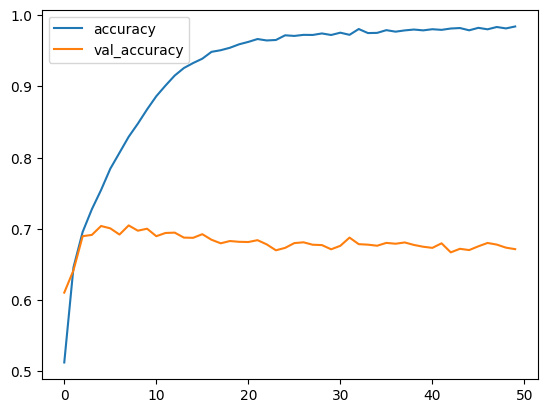

In [22]:
df[["accuracy","val_accuracy"]].plot();

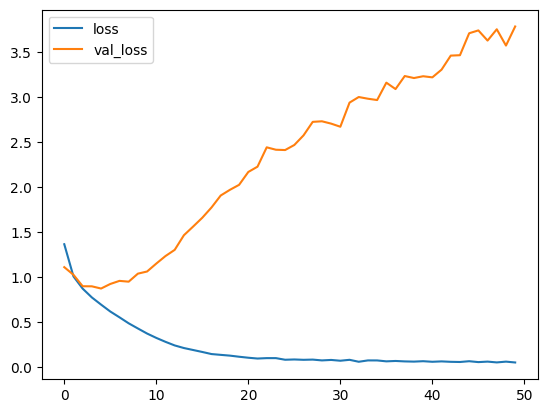

In [23]:
df[["loss","val_loss"]].plot();

we can see the base model is not performing well. It is overfitting and the testing accuracy is less than 70%.

We need to improve the architecture to obtain better results.

# Model - Version 02

Let's try to make the model a bit deeper which will require more training time.

In [26]:
model_v2 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [27]:
model_v2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 64)         

In [28]:
model_v2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [29]:
history_v2 = model_v2.fit(X_train,y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5082 - accuracy: 0.4426 - val_loss: 1.2387 - val_accuracy: 0.5555
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0738 - accuracy: 0.6136 - val_loss: 0.9833 - val_accuracy: 0.6530
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8806 - accuracy: 0.6896 - val_loss: 0.8554 - val_accuracy: 0.7005
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7602 - accuracy: 0.7320 - val_loss: 0.8062 - val_accuracy: 0.7175
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6724 - accuracy: 0.7642 - val_loss: 0.8292 - val_accuracy: 0.7181
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6011 - accuracy: 0.7895 - val_loss: 0.8406 - val_accuracy: 0.7174
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5430 - accuracy: 0.8076 - val_loss: 0.8558 - val_accuracy

In [30]:
df_v2 = pd.DataFrame(history_v2.history)
df_v2

,loss,accuracy,val_loss,val_accuracy
0,1.508201,0.44256,1.238714,0.5555
1,1.073753,0.61360,0.983303,0.6530
2,0.880608,0.68962,0.855447,0.7005
3,0.760228,0.73198,0.806196,0.7175
4,0.672406,0.76420,0.829208,0.7181
5,0.601073,0.78948,0.840579,0.7174
6,0.543006,0.80760,0.855762,0.7172
7,0.485895,0.82922,0.840861,0.7354
8,0.437778,0.84552,0.867900,0.7269
9,0.395587,0.86072,0.897602,0.7322


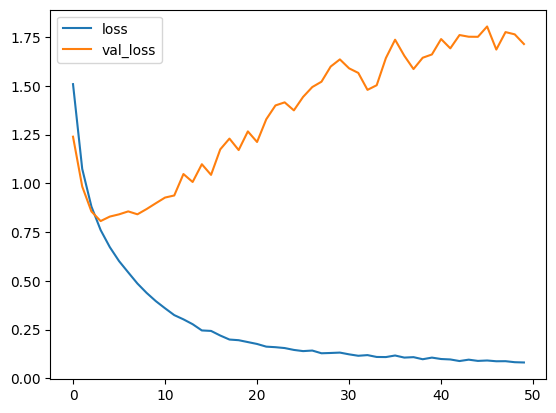

In [33]:
df_v2[["loss","val_loss"]].plot();

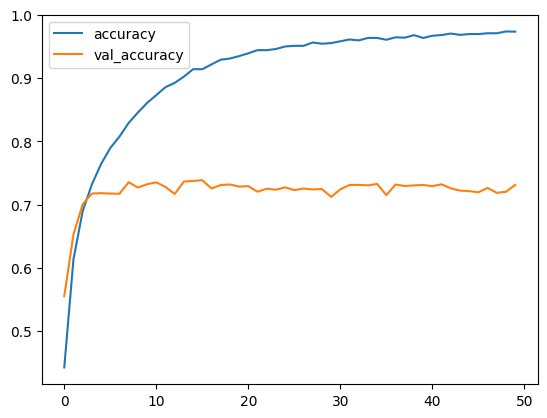

In [31]:
df_v2[["accuracy","val_accuracy"]].plot();

There is only a small improvement in performance. Making the model 7-layer deep did not provide desirable improvement. The model is still overfitting. so, what to do?

**Model - Version 02.02 - Effect of changing batch size**

# Model - Version 02.02 - Effect of changing batch size

The default batch size is 32. we did not change the value previously. Lets make it to 128 and see the effect - the training time is reduced.

In [55]:
model_v2_2 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [56]:
model_v2_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [57]:
history_v2_2 = model_v2_2.fit(X_train,y_train, epochs=50, batch_size= 128, validation_data=(X_test,y_test))

Epoch 1/50
391/391 [==============================] - 5s 9ms/step - loss: 1.6459 - accuracy: 0.3915 - val_loss: 1.3321 - val_accuracy: 0.5084
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 1.2270 - accuracy: 0.5623 - val_loss: 1.1534 - val_accuracy: 0.5840
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 1.0340 - accuracy: 0.6327 - val_loss: 0.9967 - val_accuracy: 0.6471
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 0.9043 - accuracy: 0.6804 - val_loss: 0.8919 - val_accuracy: 0.6936
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.8113 - accuracy: 0.7135 - val_loss: 0.8354 - val_accuracy: 0.7141
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 0.7347 - accuracy: 0.7433 - val_loss: 0.8523 - val_accuracy: 0.7063
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 0.6676 - accuracy: 0.7661 - val_loss: 0.8055 - val_accuracy: 0.7238
Epoch 

The number of steps per epoch has reduced to 391 (no of training samples/batch size = 50000/128)

In [58]:
df_v2_2 = pd.DataFrame(history_v2_2.history)

In [59]:
df_v2_2.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.084665,0.97084,1.811668,0.7237
46,0.066267,0.97672,2.113130,0.7224
47,0.074958,0.97434,1.855100,0.7198
48,0.062721,0.97870,1.926531,0.7202
49,0.063107,0.97866,2.030386,0.7213


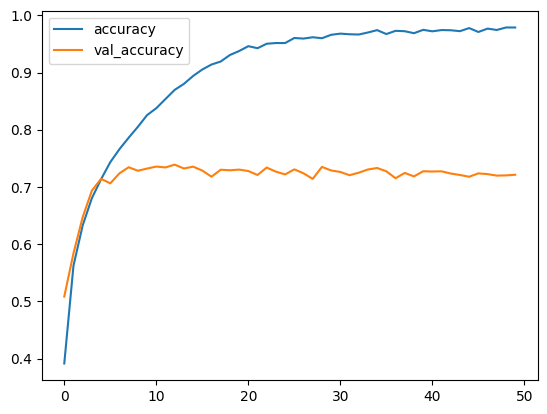

In [60]:
df_v2_2[["accuracy","val_accuracy"]].plot();

Increasing the batch size did not have a large effect on the performance accuracy but the training time reduced significantly. This can be beneficial when you have a larger network i.e. many parameters to train.

# Model - Version 03

In [69]:
model_v3 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding= 'same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),

    tf.keras.layers.Conv2D(32, (3,3), padding= 'same',  activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),

    tf.keras.layers.Conv2D(128, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [70]:
model_v3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_74 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_75 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 16, 16, 64)      

In [71]:
model_v3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [72]:
history_v3 = model_v3.fit(X_train,y_train, epochs=50, batch_size= 64, validation_data=(X_test,y_test))
# default batch size is 32. Lets make it 64 to make the process faster.

Epoch 1/50
782/782 [==============================] - 10s 8ms/step - loss: 1.4695 - accuracy: 0.4636 - val_loss: 1.2504 - val_accuracy: 0.5590
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.0169 - accuracy: 0.6389 - val_loss: 0.9563 - val_accuracy: 0.6678
Epoch 3/50
782/782 [==============================] - 6s 7ms/step - loss: 0.8287 - accuracy: 0.7081 - val_loss: 0.8763 - val_accuracy: 0.6984
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.7083 - accuracy: 0.7515 - val_loss: 0.8551 - val_accuracy: 0.7127
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.6060 - accuracy: 0.7872 - val_loss: 0.7661 - val_accuracy: 0.7369
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.5290 - accuracy: 0.8143 - val_loss: 0.7742 - val_accuracy: 0.7452
Epoch 7/50
782/782 [==============================] - 6s 7ms/step - loss: 0.4486 - accuracy: 0.8415 - val_loss: 0.7739 - val_accuracy: 0.7499
Epoch

In [73]:
df_v3 = pd.DataFrame(history_v3.history)
df_v3.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.073280,0.97764,2.065411,0.7355
46,0.072689,0.97666,2.217067,0.7307
47,0.065053,0.97938,2.196284,0.7360
48,0.067589,0.97952,2.390658,0.7338
49,0.067733,0.97874,2.287549,0.7317


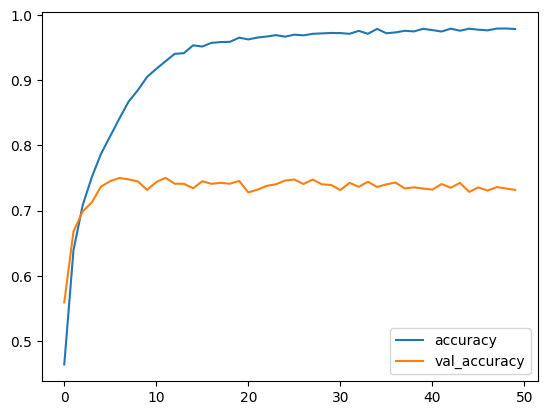

In [74]:
df_v3[["accuracy","val_accuracy"]].plot();

we can see the val_acc improved slighly. The v3 model is not much different than v2. Pooling is added after 2 layers and the size is reduced gradually. Moreover, in V2 model, the feature map in the later layers become (1,1) size due to constant pooling which is not preferable. It was changed in V3 - (4,4) and the performance improved slightly.

However, the model is still overfitting.

# Model - V4 - Dropout Regularization

This is a regularization technique that helps reducing overfitting. See how it can be applied.

In [76]:
model_v4 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding= 'same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),

    tf.keras.layers.Conv2D(32, (3,3), padding= 'same',  activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [77]:
model_v4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_82 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_83 (Conv2D)          (None, 16, 16, 64)      

Adding dropout layer does not affect parameter size

In [78]:
model_v4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [79]:
history_v4 = model_v4.fit(X_train,y_train, epochs=50, batch_size= 64, validation_data=(X_test,y_test))

Epoch 1/50
782/782 [==============================] - 11s 10ms/step - loss: 1.5609 - accuracy: 0.4244 - val_loss: 1.2001 - val_accuracy: 0.5710
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1260 - accuracy: 0.6009 - val_loss: 0.9955 - val_accuracy: 0.6553
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9513 - accuracy: 0.6641 - val_loss: 0.8983 - val_accuracy: 0.6898
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8491 - accuracy: 0.7012 - val_loss: 0.8021 - val_accuracy: 0.7174
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7738 - accuracy: 0.7263 - val_loss: 0.7510 - val_accuracy: 0.7405
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7103 - accuracy: 0.7507 - val_loss: 0.7102 - val_accuracy: 0.7560
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.6618 - accuracy: 0.7685 - val_loss: 0.7362 - val_accuracy: 0.7472
Epoc

In [80]:
df_v4 = pd.DataFrame(history_v4.history)
df_v4.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.242279,0.91508,0.855407,0.7825
46,0.236289,0.91582,0.874083,0.7818
47,0.241312,0.91496,0.907078,0.7814
48,0.236739,0.91778,0.931379,0.7791
49,0.222295,0.92136,0.918937,0.7880


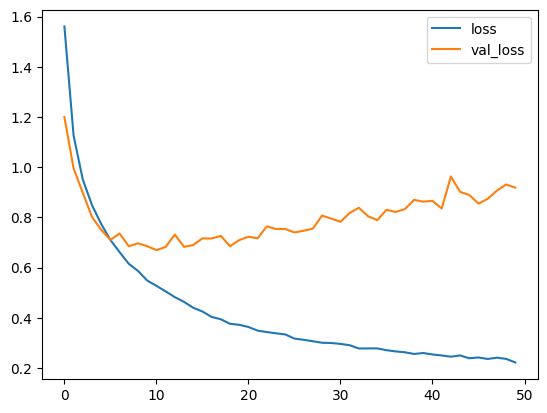

In [82]:
df_v4[["loss","val_loss"]].plot();

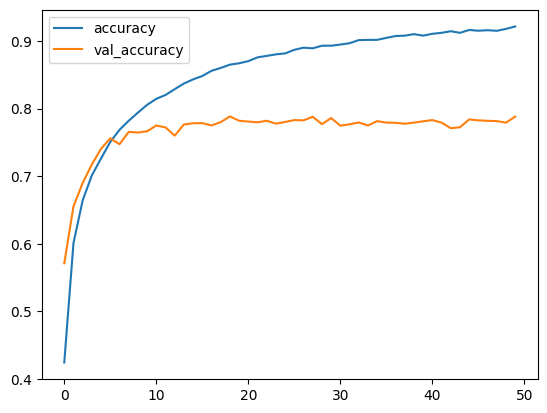

In [81]:
df_v4[["accuracy","val_accuracy"]].plot();

We can see the overfitting has been reduced as well as the validation performance improved by 6-7%.

# Model - V5 - Batch Normalization

In [83]:
model_v5 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding= 'same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding= 'same',  activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [84]:
model_v5.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_87 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

Batch norm add a few parameters in the model

In [85]:
model_v5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [86]:
history_v5 = model_v5.fit(X_train,y_train, epochs=50, batch_size= 64, validation_data=(X_test,y_test))

Epoch 1/50
782/782 [==============================] - 13s 12ms/step - loss: 1.2853 - accuracy: 0.5419 - val_loss: 2.9233 - val_accuracy: 0.2657
Epoch 2/50
782/782 [==============================] - 9s 12ms/step - loss: 0.8936 - accuracy: 0.6847 - val_loss: 1.0935 - val_accuracy: 0.6226
Epoch 3/50
782/782 [==============================] - 8s 11ms/step - loss: 0.7667 - accuracy: 0.7320 - val_loss: 0.7362 - val_accuracy: 0.7411
Epoch 4/50
782/782 [==============================] - 9s 11ms/step - loss: 0.6810 - accuracy: 0.7637 - val_loss: 1.1137 - val_accuracy: 0.6282
Epoch 5/50
782/782 [==============================] - 9s 11ms/step - loss: 0.6183 - accuracy: 0.7857 - val_loss: 0.6961 - val_accuracy: 0.7638
Epoch 6/50
782/782 [==============================] - 8s 11ms/step - loss: 0.5638 - accuracy: 0.8053 - val_loss: 0.7431 - val_accuracy: 0.7540
Epoch 7/50
782/782 [==============================] - 9s 12ms/step - loss: 0.5263 - accuracy: 0.8168 - val_loss: 0.6464 - val_accuracy: 0.782

In [87]:
df_v5 = pd.DataFrame(history_v5.history)
df_v5.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.129276,0.95400,0.742151,0.8139
46,0.130499,0.95404,0.678174,0.8329
47,0.125566,0.95514,0.681997,0.8319
48,0.118478,0.95802,0.678596,0.8310
49,0.119376,0.95778,0.777992,0.8105


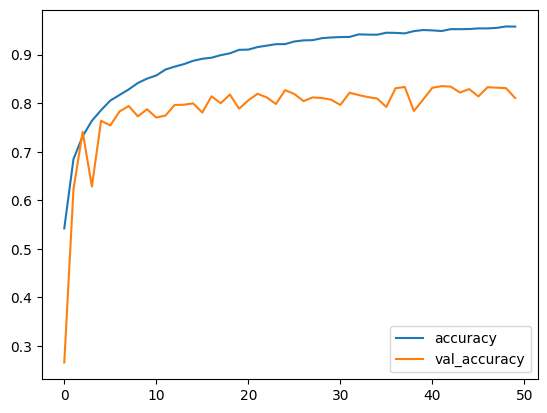

In [88]:
df_v5[["accuracy","val_accuracy"]].plot();

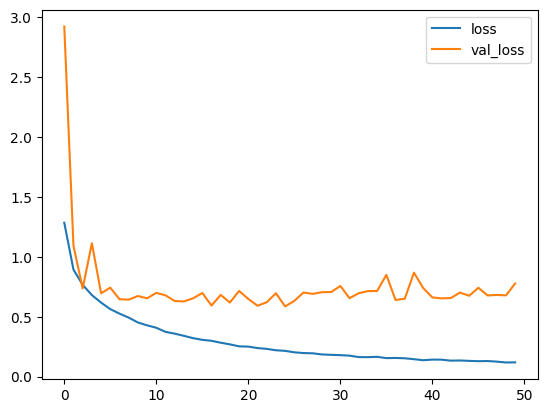

In [89]:
df_v5[["loss","val_loss"]].plot();

# Plot Predictions

In [91]:
label = {0:'airplane',
             1:'automobile',
             2:'bird',
             3:'cat',
             4:'deer',
             5:'dog',
             6:'frog',
             7:'horse',
             8:'ship',
             9:'truck'}

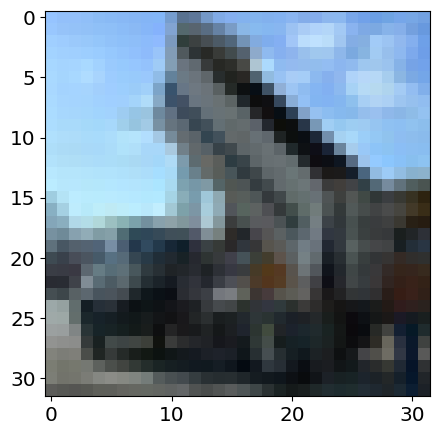

In [94]:
test_image = X_test[50]
plt.imshow(test_image)

In [95]:
y_test[50]

array([9], dtype=uint8)

In [96]:
model_v5.predict(test_image)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [98]:
test_image = test_image.reshape((1,32,32,3))
pred = model_v5.predict(test_image)
pred

1/1 [==============================] - 0s 19ms/step


array([[4.7028687e-10, 3.7914011e-10, 5.8651628e-10, 3.0582383e-09,
        4.6462012e-09, 9.4760990e-09, 4.4614368e-04, 1.1799131e-07,
        7.0243017e-10, 9.9955374e-01]], dtype=float32)

In [99]:
tf.argmax(pred, axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([9])>